In [1]:
# Import necessary libraries
from src.models import RNNModel
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
from os.path import dirname, join as pjoin
import torch
from torch import nn

# Set data type and device
dtype = torch.float
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device("cpu")

# Close all open plots
plt.close('all')

In [2]:
# Load data from file
folderpath = os.getcwd()
filepath = pjoin(folderpath, 'input.mat')
data_in = scipy.io.loadmat(filepath)
filepath = pjoin(folderpath, 'output.mat')
data_out = scipy.io.loadmat(filepath)

# Extract data from dictionary
dExp, yExp, dExp_val, yExp_val, time__ = data_in['dExp'], data_out['yExp'], \
    data_in['dExp_val'], data_out['yExp_val'], data_in['time__']
nExp = yExp.size


In [3]:
# Create time vector
#t = np.arange(0, np.size(dExp[0, 0], 1) * Ts, Ts)
t = time__

# Set end time
t_end = t.size

# Initialize input and output tensors
u = torch.zeros(nExp, t_end, 5)
y = torch.zeros(nExp, t_end, 2)

# Set input number
inputnumberD = 4

# Fill input and output tensors with data
for j in range(nExp):
    #inputActive = (torch.from_numpy(dExp[0, j]))
    u[j, :, :] = (torch.from_numpy(dExp[0, j]))
    y[j, :, :] = (torch.from_numpy(yExp[0, j]))

# Set random seed for reproducibility
seed = 1
torch.manual_seed(seed)

In [4]:
#Set dimensions for RNN layers
idd = dExp[0, 0].shape[1]
hdd = 10
ldd = 2
odd = yExp[0, 0].shape[1]

# Initialize RNN model
RNN = RNNModel(idd, hdd, ldd, odd)

# Define loss function
MSE = nn.MSELoss()

# Define optimization method
learning_rate = 1.0e-2
optimizer = torch.optim.Adam(RNN.parameters(), lr=learning_rate)
optimizer.zero_grad()

# Set number of epochs
epochs = 80

# Initialize array to store loss values
LOSS = np.zeros(epochs)


In [5]:
# Train the RNN model
for epoch in range(epochs):
    # Adjust learning rate at certain epochs
    if epoch == epochs - epochs / 2:
        learning_rate = 1.0e-3
        optimizer = torch.optim.Adam(RNN.parameters(), lr=learning_rate)
    if epoch == epochs - epochs / 6:
        learning_rate = 1.0e-4
        optimizer = torch.optim.Adam(RNN.parameters(), lr=learning_rate)
    optimizer.zero_grad()
    loss = 0

    # Get RNN output for training data
    yRNN = RNN(u)
    yRNN = torch.squeeze(yRNN)
    

    # Calculate loss and backpropagate
    loss = MSE(yRNN, y)
    loss.backward()
    optimizer.step()
    

    # Print loss for current epoch
    print(f"Epoch: {epoch + 1} \t||\t Loss: {loss}")
    LOSS[epoch] = loss

Epoch: 1 	||	 Loss: 0.46656960248947144
Epoch: 2 	||	 Loss: 0.39311105012893677
Epoch: 3 	||	 Loss: 0.3027805685997009
Epoch: 4 	||	 Loss: 0.2107544243335724
Epoch: 5 	||	 Loss: 0.125478133559227
Epoch: 6 	||	 Loss: 0.06449468433856964
Epoch: 7 	||	 Loss: 0.06474065780639648
Epoch: 8 	||	 Loss: 0.091435007750988
Epoch: 9 	||	 Loss: 0.07580991089344025
Epoch: 10 	||	 Loss: 0.04462100937962532
Epoch: 11 	||	 Loss: 0.021756986156105995
Epoch: 12 	||	 Loss: 0.011998498812317848
Epoch: 13 	||	 Loss: 0.011232872493565083
Epoch: 14 	||	 Loss: 0.013512494042515755
Epoch: 15 	||	 Loss: 0.014977680519223213
Epoch: 16 	||	 Loss: 0.014543945901095867
Epoch: 17 	||	 Loss: 0.012798361480236053
Epoch: 18 	||	 Loss: 0.011060990393161774
Epoch: 19 	||	 Loss: 0.010448160581290722
Epoch: 20 	||	 Loss: 0.010902603156864643
Epoch: 21 	||	 Loss: 0.012087724171578884
Epoch: 22 	||	 Loss: 0.013548753224313259
Epoch: 23 	||	 Loss: 0.014742769300937653
Epoch: 24 	||	 Loss: 0.015212039463222027
Epoch: 25 	||	 Lo

In [6]:
# Initialize input and output tensors for validation data
nExp = yExp_val.size
uval = torch.zeros(nExp, t_end, 5)
yval = torch.zeros(nExp, t_end, 2)

# Fill input and output tensors with validation data
for j in range(nExp):
    inputActive = (torch.from_numpy(dExp_val[0, j]))
    uval[j, :, :] = torch.unsqueeze(inputActive[:,inputnumberD], 1)
    yval[j, :, :] = (torch.from_numpy(yExp_val[0, j]))

# Get RNN output for validation data
yRNN_val = RNN(uval)
yRNN_val = yRNN_val.unsqueeze_(0)

# Calculate loss for validation data
loss_val = MSE(yRNN_val, yval)

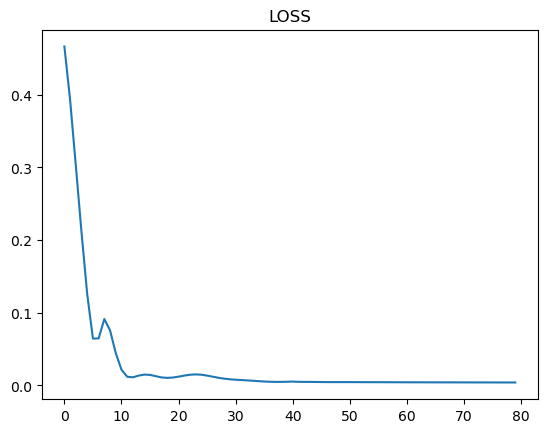

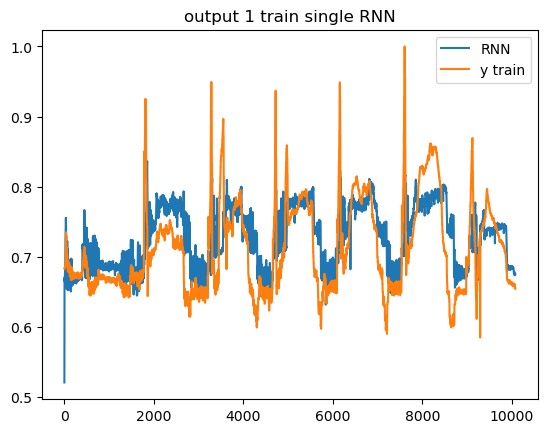

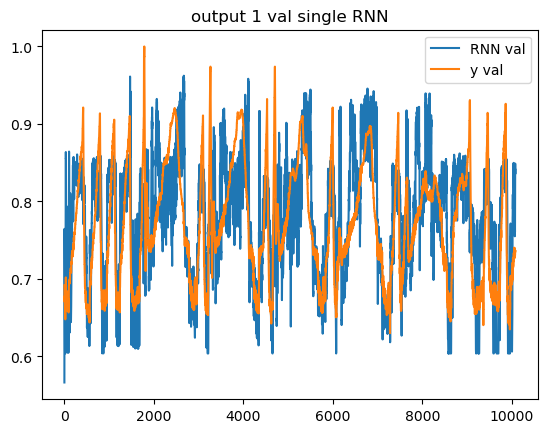

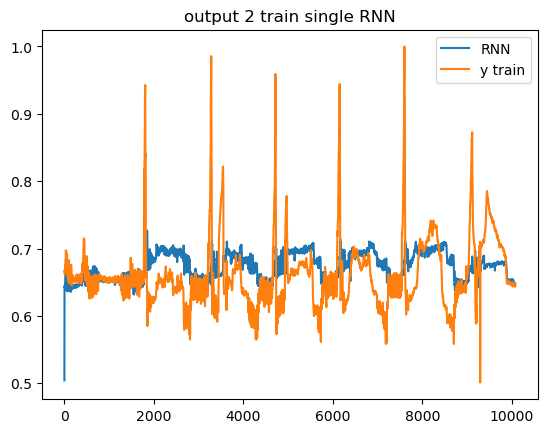

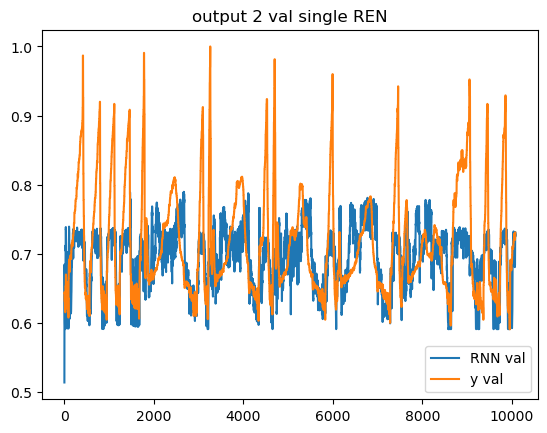

Loss Validation single RNN: 0.004413697402924299


In [7]:
# Plot loss over epochs
plt.figure('8')
plt.plot(LOSS)
plt.title("LOSS")
plt.show()

# Plot output 1 for training data
plt.figure('9')
plt.plot(yRNN[0, :, 0].detach().numpy(), label='RNN')
plt.plot(y[0, :, 0].detach().numpy(), label='y train')
plt.title("output 1 train single RNN")
plt.legend()
plt.show()

# Plot output 1 for validation data
plt.figure('10')
plt.plot(yRNN_val[0, :, 0].detach().numpy(), label='RNN val')
plt.plot(yval[0, :, 0].detach().numpy(), label='y val')
plt.title("output 1 val single RNN")
plt.legend()
plt.show()

# Plot output 2 for training data
plt.figure('11')
plt.plot(yRNN[0, :, 1].detach().numpy(), label='RNN')
plt.plot(y[0, :, 1].detach().numpy(), label='y train')
plt.title("output 2 train single RNN")
plt.legend()
plt.show()

# Plot output 2 for validation data
plt.figure('12')
plt.plot(yRNN_val[0, :, 1].detach().numpy(), label='RNN val')
plt.plot(yval[0, :, 1].detach().numpy(), label='y val')
plt.title("output 2 val single REN")
plt.legend()
plt.show()

# Save RNN output and validation data to file
scipy.io.savemat('data_singleRNN_sysID.mat', dict(yRENm_val=yRNN_val.detach().numpy(), yval=yval.detach().numpy()))

# Print validation loss
print(f"Loss Validation single RNN: {loss_val}")